In [8]:
import altair as alt
import streamlit as st
import pandas as pd
from pycaret.regression import *

In [9]:
crime_df = pd.read_csv("crimedata.csv")

In [10]:
crime_df['population']

Index(['communityName', 'state', 'countyCode', 'communityCode', 'population',
       'householdsize', 'racepctblack', 'racePctWhite', 'racePctAsian',
       'racePctHisp',
       ...
       'burglaries', 'burglPerPop', 'larcenies', 'larcPerPop', 'autoTheft',
       'autoTheftPerPop', 'arsons', 'arsonsPerPop', 'ViolentCrimesPerPop',
       'nonViolPerPop'],
      dtype='object', length=146)

In [5]:
reg1 = setup(data = crime_df, target = "nonViolPerPop")

2022-12-05 07:34:09.618 INFO    logs: create_model_container: 0
2022-12-05 07:34:09.619 INFO    logs: master_model_container: 0
2022-12-05 07:34:09.620 INFO    logs: display_container: 1
2022-12-05 07:34:09.626 INFO    logs: Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[],
                                      target='nonViolPerPop',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_st...
                ('scaling', 'passthrough'), ('P_transform', 'p

In [7]:
lr = create_model("lr")

2022-12-05 07:35:36.623 INFO    logs: create_model_container: 1
2022-12-05 07:35:36.624 INFO    logs: master_model_container: 1
2022-12-05 07:35:36.624 INFO    logs: display_container: 2
2022-12-05 07:35:36.624 INFO    logs: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)
2022-12-05 07:35:36.625 INFO    logs: create_model() succesfully completed......................................


In [7]:
best = compare_models()

2022-12-05 14:33:02.736 INFO    logs: Initializing compare_models()
2022-12-05 14:33:02.738 INFO    logs: compare_models(include=None, fold=None, round=4, cross_validation=True, sort=R2, n_select=1, budget_time=None, turbo=True, errors=ignore, fit_kwargs=None, groups=None, experiment_custom_tags=None, probability_threshold=None, verbose=True, display=None, exclude=None)
2022-12-05 14:33:02.738 INFO    logs: Checking exceptions


NameError: name '_all_models' is not defined

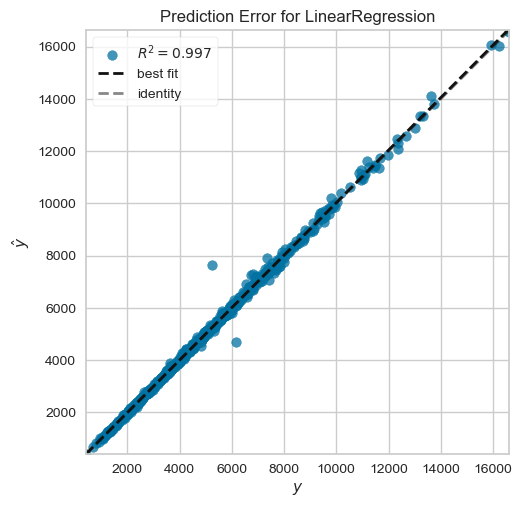

2022-12-05 07:51:20.611 INFO    logs: Visual Rendered Successfully
2022-12-05 07:51:20.748 INFO    logs: plot_model() succesfully completed......................................


In [12]:
plot_model(lr, plot='error')

In [7]:
corr_matrix = crime_df.corr()

In [13]:
corr_matrix.to_csv('corr.csv')

In [20]:
corr_matrix.index

Index(['countyCode', 'communityCode', 'population', 'householdsize',
       'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp',
       'agePct12t21', 'agePct12t29',
       ...
       'burglaries', 'burglPerPop', 'larcenies', 'larcPerPop', 'autoTheft',
       'autoTheftPerPop', 'arsons', 'arsonsPerPop', 'ViolentCrimesPerPop',
       'nonViolPerPop'],
      dtype='object', length=144)

In [21]:
corr_matrix = corr_matrix.reset_index(level=0)

In [32]:
temp = corr_matrix[['index', 'murders']].sort_values(by="murders", ascending=False)
 

In [34]:
census_stats = ['population','householdsize','racepctblack','racePctWhite','racePctAsian','racePctHisp','agePct12t21','agePct12t29','agePct16t24','agePct65up','numbUrban','pctUrban','medIncome','pctWWage','pctWFarmSelf','pctWInvInc','pctWSocSec','pctWPubAsst','pctWRetire','medFamInc','perCapInc','whitePerCap','blackPerCap','indianPerCap','AsianPerCap','OtherPerCap','HispPerCap','NumUnderPov','PctPopUnderPov','PctLess9thGrade','PctNotHSGrad','PctBSorMore','PctUnemployed','PctEmploy','PctEmplManu','PctEmplProfServ','PctOccupManu','PctOccupMgmtProf','MalePctDivorce','MalePctNevMarr','FemalePctDiv','TotalPctDiv','PersPerFam','PctFam2Par','PctKids2Par','PctYoungKids2Par','PctTeen2Par','PctWorkMomYoungKids','PctWorkMom','NumKidsBornNeverMar','PctKidsBornNeverMar','NumImmig','PctImmigRecent','PctImmigRec5','PctImmigRec8','PctImmigRec10','PctRecentImmig','PctRecImmig5','PctRecImmig8','PctRecImmig10','PctSpeakEnglOnly','PctNotSpeakEnglWell','PctLargHouseFam','PctLargHouseOccup','PersPerOccupHous','PersPerOwnOccHous','PersPerRentOccHous','PctPersOwnOccup','PctPersDenseHous','PctHousLess3BR','MedNumBR','HousVacant','PctHousOccup','PctHousOwnOcc','PctVacantBoarded','PctVacMore6Mos','MedYrHousBuilt','PctHousNoPhone','PctWOFullPlumb','OwnOccLowQuart','OwnOccMedVal','OwnOccHiQuart','OwnOccQrange','RentLowQ','RentMedian','RentHighQ','RentQrange','MedRent','MedRentPctHousInc','MedOwnCostPctInc','MedOwnCostPctIncNoMtg','NumInShelters','NumStreet','PctForeignBorn','PctBornSameState','PctSameHouse85','PctSameCity85','PctSameState85']

In [48]:
temp[temp['index'].isin(census_stats)]['index'].iloc[0]

'NumKidsBornNeverMar'

In [50]:
crime_selected_corr = corr_matrix[['index', 'murders']].sort_values(by='murders', ascending=False)
filtered_corr = crime_selected_corr[crime_selected_corr['index'].isin(census_stats)]['index'].iloc[0]

In [51]:
filtered_corr

'NumKidsBornNeverMar'

In [6]:
chart = alt.Chart(crime_df).mark_point().encode(
    x='murders',
    y='racePctWhite'
)
chart + chart.transform_regression('murders','racePctWhite').mark_line()

alt.LayerChart(...)

Index(['communityName', 'state', 'countyCode', 'communityCode', 'population',
       'householdsize', 'racepctblack', 'racePctWhite', 'racePctAsian',
       'racePctHisp',
       ...
       'burglaries', 'burglPerPop', 'larcenies', 'larcPerPop', 'autoTheft',
       'autoTheftPerPop', 'arsons', 'arsonsPerPop', 'ViolentCrimesPerPop',
       'nonViolPerPop'],
      dtype='object', length=146)


In [56]:
trim_cols = ['state','population','householdsize','agePct12t21','agePct12t29','agePct16t24','agePct65up','medIncome','pctWPubAsst','PctNotHSGrad','PctUnemployed','PctEmploy','TotalPctDiv','PersPerFam','HousVacant','NumInShelters','NumStreet','ViolentCrimesPerPop','nonViolPerPop']

In [57]:
crime_mdl_df = crime_df[trim_cols]


In [86]:
reg1 = setup(data = crime_mdl_df, target = "nonViolPerPop", ignore_features=['ViolentCrimesPerPop'], silent=True, verbose=False)

2022-12-05 16:27:58.507 INFO    logs: PyCaret Supervised Module
2022-12-05 16:27:58.507 INFO    logs: ML Usecase: regression
2022-12-05 16:27:58.507 INFO    logs: version 2.3.10
2022-12-05 16:27:58.508 INFO    logs: Initializing setup()
2022-12-05 16:27:58.508 INFO    logs: setup(target=nonViolPerPop, ml_usecase=regression, available_plots={'parameter': 'Hyperparameters', 'residuals': 'Residuals', 'error': 'Prediction Error', 'cooks': 'Cooks Distance', 'rfe': 'Feature Selection', 'learning': 'Learning Curve', 'manifold': 'Manifold Learning', 'vc': 'Validation Curve', 'feature': 'Feature Importance', 'feature_all': 'Feature Importance (All)', 'tree': 'Decision Tree', 'residuals_interactive': 'Interactive Residuals'}, train_size=0.7, test_data=None, preprocess=True, imputation_type=simple, iterative_imputation_iters=5, categorical_features=None, categorical_imputation=constant, categorical_iterative_imputer=lightgbm, ordinal_features=None, high_cardinality_features=None, high_cardinality

In [59]:
best = compare_models()

2022-12-05 15:10:39.148 INFO    logs: create_model_container: 18
2022-12-05 15:10:39.148 INFO    logs: master_model_container: 18
2022-12-05 15:10:39.148 INFO    logs: display_container: 2
2022-12-05 15:10:39.149 INFO    logs: Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=7415,
      selection='cyclic', tol=0.0001, warm_start=False)
2022-12-05 15:10:39.149 INFO    logs: compare_models() succesfully completed......................................


In [87]:
et_nonv = create_model('et')

2022-12-05 16:28:05.562 INFO    logs: create_model_container: 1
2022-12-05 16:28:05.563 INFO    logs: master_model_container: 1
2022-12-05 16:28:05.563 INFO    logs: display_container: 2
2022-12-05 16:28:05.564 INFO    logs: ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=5811, verbose=0, warm_start=False)
2022-12-05 16:28:05.564 INFO    logs: create_model() succesfully completed......................................


In [89]:
final_non = finalize_model(et_nonv)

2022-12-05 16:28:13.267 INFO    logs: Initializing finalize_model()
2022-12-05 16:28:13.267 INFO    logs: finalize_model(estimator=ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=5811, verbose=0, warm_start=False), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
2022-12-05 16:28:13.268 INFO    logs: Finalizing ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
         

In [90]:
save_model(final_non, "non_viol_mdl")

2022-12-05 16:28:17.209 INFO    logs: Initializing save_model()
2022-12-05 16:28:17.210 INFO    logs: save_model(model=ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=5811, verbose=0, warm_start=False), model_name=non_viol_mdl, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False,
                                      features_todrop=['ViolentCrimesPerPop'],
                                      id_columns=[], ml_usecase='regression',
                                  

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False,
                                       features_todrop=['ViolentCrimesPerPop'],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='nonViolPerPop',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_num...
                  ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                      criterion='mse', max_depth=None,
                                      max_features='auto', max_leaf_nodes=None,
                                      max_sample

In [63]:
reg2 = setup(data = crime_mdl_df, target = "ViolentCrimesPerPop", ignore_features=['nonViolPerPop'], silent=True)

2022-12-05 15:11:09.965 INFO    logs: create_model_container: 0
2022-12-05 15:11:09.965 INFO    logs: master_model_container: 0
2022-12-05 15:11:09.966 INFO    logs: display_container: 1
2022-12-05 15:11:09.969 INFO    logs: Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False,
                                      features_todrop=['nonViolPerPop'],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[],
                                      target='ViolentCrimesPerPop',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_num...
                ('scaling', 'passthrough'), ('P_transform

In [64]:
best = compare_models()

2022-12-05 15:11:18.768 INFO    logs: create_model_container: 18
2022-12-05 15:11:18.768 INFO    logs: master_model_container: 18
2022-12-05 15:11:18.768 INFO    logs: display_container: 2
2022-12-05 15:11:18.769 INFO    logs: ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=5645, verbose=0, warm_start=False)
2022-12-05 15:11:18.769 INFO    logs: compare_models() succesfully completed......................................


In [65]:
et_vio = create_model('et')

2022-12-05 15:11:22.263 INFO    logs: create_model_container: 19
2022-12-05 15:11:22.263 INFO    logs: master_model_container: 19
2022-12-05 15:11:22.263 INFO    logs: display_container: 3
2022-12-05 15:11:22.264 INFO    logs: ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=5645, verbose=0, warm_start=False)
2022-12-05 15:11:22.264 INFO    logs: create_model() succesfully completed......................................


In [66]:
final_vio = finalize_model(et_vio)

2022-12-05 15:11:23.905 INFO    logs: Initializing finalize_model()
2022-12-05 15:11:23.905 INFO    logs: finalize_model(estimator=ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=5645, verbose=0, warm_start=False), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
2022-12-05 15:11:23.906 INFO    logs: Finalizing ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
         

In [67]:
save_model(final_vio, "viol_mdl")

2022-12-05 15:11:26.969 INFO    logs: Initializing save_model()
2022-12-05 15:11:26.970 INFO    logs: save_model(model=ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=5645, verbose=0, warm_start=False), model_name=viol_mdl, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False,
                                      features_todrop=['nonViolPerPop'],
                                      id_columns=[], ml_usecase='regression',
                                      numeri

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False,
                                       features_todrop=['nonViolPerPop'],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='ViolentCrimesPerPop',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_num...
                  ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                      criterion='mse', max_depth=None,
                                      max_features='auto', max_leaf_nodes=None,
                                      max_sample

In [84]:
crime_df['householdsize'].max()

5.28